## Import libraries


In [17]:
import keras
from keras.preprocessing.image import ImageDataGenerator

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D
import os


In [19]:
# Define no of classes
num_classes = 7


In [20]:
img_rows, img_cols = 48, 48

In [21]:
batch_size = 8

# Import the dataset
Here, I imported the dataset from Kaggle


In [22]:

train_data = "/home/pneuma/Desktop/Assessment/Dataset/train/"

In [23]:
val_data = '/home/pneuma/Desktop/Assessment/Dataset/validation/'

## Data Augmentation

In [24]:
train_data_generator = ImageDataGenerator(rescale=1./255, rotation_range=30, shear_range= 0.3, 
                                         zoom_range=0.3, width_shift_range=0.4, height_shift_range=0.3,
                                         horizontal_flip=True, vertical_flip=True,fill_mode='nearest')
validation_data_generator = ImageDataGenerator(rescale=1./255)

In [25]:
train_generator = train_data_generator.flow_from_directory(train_data, color_mode='grayscale',
                                                          target_size = (img_rows, img_cols), batch_size=batch_size,
                                                          class_mode = 'categorical', shuffle = True)

validation_generator = validation_data_generator.flow_from_directory(val_data, color_mode='grayscale',
                                                          target_size = (img_rows, img_cols), batch_size = batch_size,
                                                          class_mode = 'categorical', shuffle = True)


Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [26]:
model = Sequential()


## Creating A CNN

In [27]:
# Block 1 of CNN
model.add(Conv2D(32,(3,3),padding = 'same', kernel_initializer = 'he_normal', input_shape = (img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding = 'same', kernel_initializer = 'he_normal', input_shape = (img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2)))
model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(64,(3,3),padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2)))
model.add(Dropout(0.2))

# Block 3
model.add(Conv2D(128,(3,3),padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2)))
model.add(Dropout(0.2))

#BLock 4
model.add(Conv2D(256,(3,3),padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2)))
model.add(Dropout(0.2))


#Flattten
model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#Dense

model.add(Dense(64, kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(0.5))

# Output

model.add(Dense(num_classes, kernel_initializer='he_normal'))
model.add(Activation('softmax'))


In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 activation_11 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_10 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 activation_12 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_11 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                     

In [29]:
# Train the model
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [30]:
checkpoint = ModelCheckpoint('/home/pneuma/Desktop/Assessment/expression_facial_vgg2.h5',
                            monitor = 'val_loss',
                            mode = 'min',
                            save_best_only=True,
                            verbose = 1
                            )

earlystop = EarlyStopping(monitor = 'val_loss',
                         min_delta=0,
                         patience=5, # No of steps for the model to stop
                         verbose=1,
                         restore_best_weights=True
                         )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                             factor=0.2,
                             patience=3,
                             verbose=1,
                             min_delta=0.0001
                             )
callbacks = [earlystop,checkpoint,reduce_lr]





In [31]:
# COmpile the model
model.compile(loss = 'categorical_crossentropy',
             optimizer = Adam(learning_rate = 0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
             metrics=['Accuracy'])


nb_train_samples = 28709
nb_validation_sample = 3589
epochs = 25


In [32]:
history =model.fit(train_generator,
                            steps_per_epoch= nb_train_samples/batch_size,
                            epochs=epochs,
                            callbacks=callbacks,
                            validation_data=validation_generator,
                            validation_steps=nb_validation_sample/batch_size) 

Epoch 1/25
3589/3588 [==============================] - ETA: 0s - loss: 1.9229 - Accuracy: 0.2155
Epoch 1: val_loss improved from inf to 1.79509, saving model to /home/pneuma/Desktop/Assessment/expression_facial_vgg2.h5
3588/3588 [==============================] - 503s 139ms/step - loss: 1.9229 - Accuracy: 0.2155 - val_loss: 1.7951 - val_Accuracy: 0.2460 - lr: 0.0010
Epoch 2/25
3589/3588 [==============================] - ETA: 0s - loss: 1.8021 - Accuracy: 0.2438
Epoch 2: val_loss did not improve from 1.79509
3588/3588 [==============================] - 393s 109ms/step - loss: 1.8021 - Accuracy: 0.2438 - val_loss: 1.7965 - val_Accuracy: 0.2502 - lr: 0.0010
Epoch 3/25
3589/3588 [==============================] - ETA: 0s - loss: 1.7823 - Accuracy: 0.2558
Epoch 3: val_loss improved from 1.79509 to 1.75559, saving model to /home/pneuma/Desktop/Assessment/expression_facial_vgg2.h5
3588/3588 [==============================] - 355s 99ms/step - loss: 1.7823 - Accuracy: 0.2558 - val_loss: 1.755

Epoch 25/25
3589/3588 [==============================] - ETA: 0s - loss: 1.4846 - Accuracy: 0.4299
Epoch 25: val_loss did not improve from 1.51283
3588/3588 [==============================] - 370s 103ms/step - loss: 1.4846 - Accuracy: 0.4299 - val_loss: 1.5312 - val_Accuracy: 0.4416 - lr: 2.0000e-04


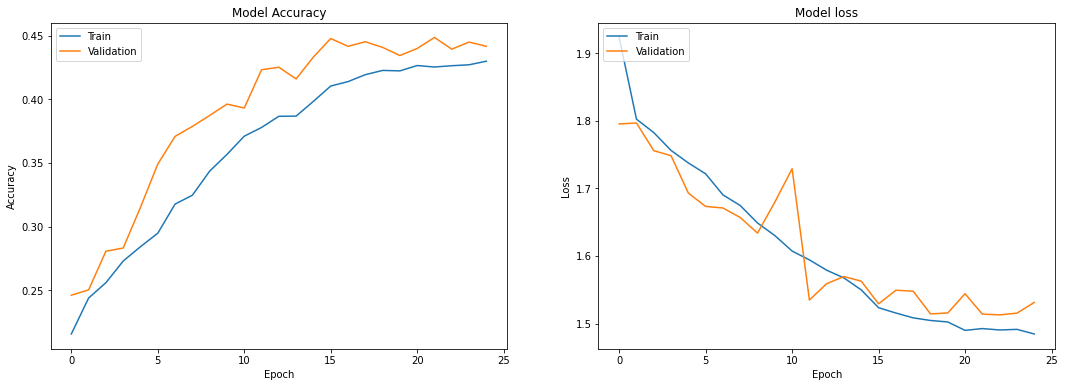

In [34]:

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2, figsize=(18, 6))
# Plot training & validation accuracy values
axes[0].plot(history.history['Accuracy'])
axes[0].plot(history.history['val_Accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')
plt.show()

